Завдання 1: Створюємо набір даних за допомогою DatasetGenerator

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Створення набору даних за допомогою make_classification
X, y = make_classification(n_samples=100,   # Кількість зразків
                           n_features=5,    # Кількість ознак
                           n_informative=3, # Кількість інформативних ознак
                           n_redundant=1,   # Кількість надлишкових ознак
                           n_classes=2,     # Кількість класів
                           random_state=42) # Випадковий seed для відтворюваності

# Перетворення в DataFrame для зручності
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Виведення перших 5 рядків згенерованого набору даних
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  target
0   0.065613  -1.814317  -0.848534   0.278723  -1.898162       0
1   1.943645  -0.781251  -0.780406  -1.020383  -0.176647       1
2   2.215437  -1.591460  -1.754176  -0.157724   0.875586       1
3   2.248896   1.438831   1.071276   0.166088  -0.733065       1
4   1.398888   1.603281   1.307294  -2.452265  -0.763596       0


Завдання 2:
 Завантажуємо набір даних для класифікації з сайту Kaggle. В моєму випадку було обрано набір даних емоцій


In [15]:
import pandas as pd

file_path = "C:\\Users\\Єва\\OneDrive\\Data\\Emotion_classify_Data.csv"

EmotionData = pd.read_csv(file_path)

# Налаштовуємо максимальну кількість рядків для виводу 
pd.set_option('display.max_rows', 100)

# Налаштовуємо максимальну кількість стовпців для виводу (всі стовпці)
pd.set_option('display.max_columns', None)

# Налаштовуємо ширину стовпців, щоб уникнути скорочення тексту
pd.set_option('display.max_colwidth', None)

pd.set_option('display.width', 1000)


print(EmotionData.head(15)) 


                                                                                                                                                                                            Comment Emotion
0                                                                                                                         i seriously hate one subject to death but now i feel reluctant to drop it    fear
1                                                                                                                                                                im so full of life i feel appalled   anger
2                                                               i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it    fear
3                                                                                                         ive been really angry with r and i feel like an idiot for trusting him in the 

Завдання 3: Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python. Для отриманих наборів даних провести встановленні кроки моделювання.


   Feature 1  Feature 2  Class
0   2.496714   1.861736      0
1   2.647689   3.523030      0
2   1.765847   1.765863      0
3   3.579213   2.767435      0
4   1.530526   2.542560      0


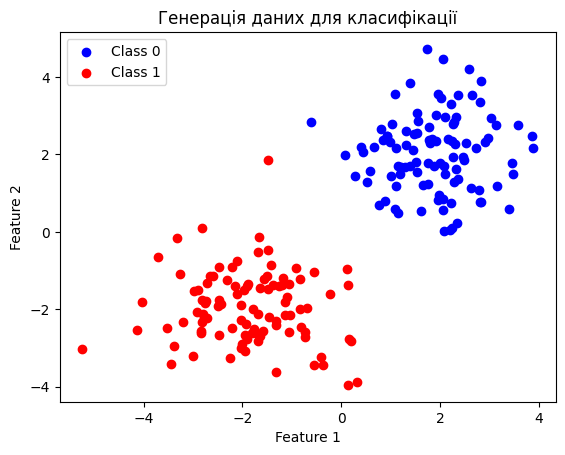

Accuracy: 0.9833333333333333
Confusion Matrix:
[[31  0]
 [ 1 28]]


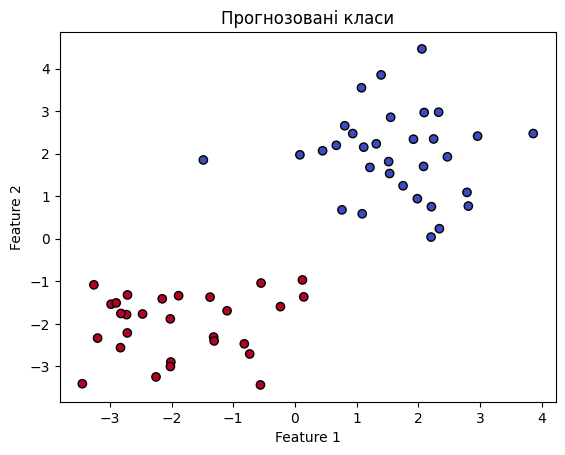

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Генерація випадкових даних для класифікації
np.random.seed(42)

# Генерація ознак (features) для двох класів
X_class_0 = np.random.randn(100, 2) + np.array([2, 2])  # Клас 0, центр у точці (2, 2)
X_class_1 = np.random.randn(100, 2) + np.array([-2, -2])  # Клас 1, центр у точці (-2, -2)

# Об'єднуємо два класи
X = np.vstack([X_class_0, X_class_1])
y = np.array([0] * 100 + [1] * 100)  # Мітки для класів 0 і 1

# Створення DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y

# Виведення перших кількох рядків набору даних
print(df.head())

# 2. Візуалізація даних
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], color='blue', label='Class 0')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Генерація даних для класифікації')
plt.legend()
plt.show()

# 3. Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Створення та навчання моделі класифікації (логістична регресія)
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Прогнозування
y_pred = model.predict(X_test)

# 6. Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Виведення результатів
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# 7. Візуалізація прогнозованих класів
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Прогнозовані класи')
plt.show()
